# Embeddings

This lab is designed to help you solidify your understanding of embeddings by applying them to tasks like semantic similarity, clustering, and building a semantic search system.

### Tasks:
- Task 1: Semantic Similarity Comparison
- Task 2: Document Clustering
- Task 3: Enhance the Semantic Search System


## Task 1: Semantic Similarity Comparison
### Objective:
Compare semantic similarity between pairs of sentences using cosine similarity and embeddings.

### Steps:
1. Load a pre-trained Sentence Transformer model.
2. Encode the sentence pairs.
3. Compute cosine similarity for each pair.

### Dataset:
- "A dog is playing in the park." vs. "A dog is running in a field."
- "I love pizza." vs. "I enjoy ice cream."
- "What is AI?" vs. "How does a computer learn?"


In [27]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Sentence pairs
sentence_pairs = [
    ("A dog is playing in the park.", "A dog is running in a field."),
    ("I love pizza.", "I enjoy ice cream."),
    ("What is AI?", "How does a computer learn?")
]

#check similarity
for s1, s2 in sentence_pairs:
    emb1 = model.encode([s1])
    emb2 = model.encode([s2])  # shape: (1, d)
    sim = cosine_similarity(emb1, emb2)[0, 0]
    print(f"{sim:.3f} :: {s1}  ||  {s2}")

0.522 :: A dog is playing in the park.  ||  A dog is running in a field.
0.528 :: I love pizza.  ||  I enjoy ice cream.
0.319 :: What is AI?  ||  How does a computer learn?


### Questions:
- **Which sentence pairs are the most semantically similar? Why?**


The most similar pair is “I love pizza.” and “I enjoy ice cream.” (0.528) because both express personal enjoyment of food in a similar grammatical form.

- **Can you think of cases where cosine similarity might fail to capture true semantic meaning?**

Cosine similarity can fail when sentences are semantically opposite but share similar wording (e.g., “I like cats” vs. “I hate cats”) or when meaning depends on context or world knowledge.

## Task 2: Document Clustering
### Objective:
Cluster a set of text documents into similar groups based on their embeddings.

### Steps:
1. Encode the documents using Sentence Transformers.
2. Use KMeans clustering to group the documents.
3. Analyze the clusters for semantic meaning.

In [28]:
#! pip install sentence_transformers

In [29]:
from sklearn.cluster import KMeans

# Documents to cluster
documents = [
    "What is the capital of France?",
    "How do I bake a chocolate cake?",
    "What is the distance between Earth and Mars?",
    "How do I change a flat tire on a car?",
    "What is the best way to learn Python?",
    "How do I fix a leaky faucet?"
]

# Encode documents

# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

X = model.encode(documents)
print(X.shape)

(6, 384)


In [30]:
from sklearn.metrics import silhouette_score

# Choose k (via silhouette)
def choose_k(embeddings, k_min=2, k_max=5, random_state=42):
    best = {"k": None, "score": -1.0}
    for k in range(k_min, k_max + 1):
        km = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        labels = km.fit_predict(embeddings)
        score = silhouette_score(embeddings, labels)
        if score > best["score"]:
            best = {"k": k, "score": score}
    return best

best = choose_k(X, k_min=2, k_max=5)
k = best["k"]
print(f"Chosen k = {k} (silhouette = {best['score']:.3f})")

# KMeans fit
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

Chosen k = 3 (silhouette = 0.029)


In [31]:
# Print cluster assignments

for i, doc in enumerate(documents):
    print(f"Document {i} -> Cluster {labels[i]} :: {doc}")

Document 0 -> Cluster 1 :: What is the capital of France?
Document 1 -> Cluster 1 :: How do I bake a chocolate cake?
Document 2 -> Cluster 1 :: What is the distance between Earth and Mars?
Document 3 -> Cluster 0 :: How do I change a flat tire on a car?
Document 4 -> Cluster 2 :: What is the best way to learn Python?
Document 5 -> Cluster 0 :: How do I fix a leaky faucet?


/tmp/ipython-input-2997923626.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("Set2", k)
/tmp/ipython-input-2997923626.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


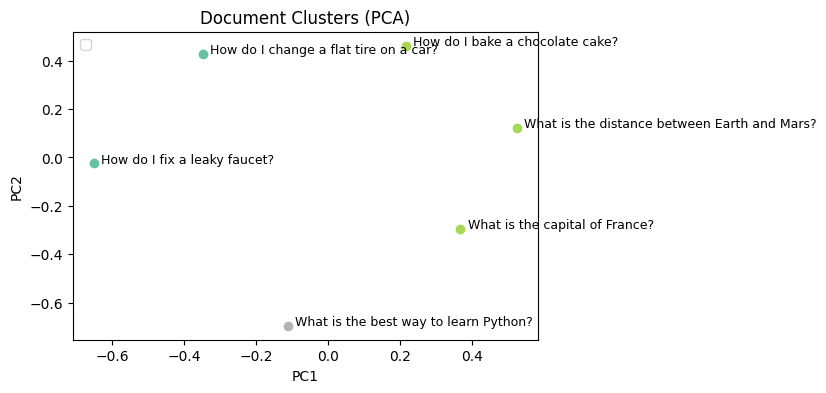

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce embeddings to 2D
pca = PCA(n_components=2)
points = pca.fit_transform(X)

# Plot
colors = plt.cm.get_cmap("Set2", k)
plt.figure(figsize=(6, 4))
for i, (x, y) in enumerate(points):
    plt.scatter(x, y, color=colors(labels[i]))
    plt.text(x + 0.02, y, documents[i], fontsize=9)  # offset text a bi

plt.title("Document Clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [33]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=2,random_state=100)
kmeans.fit(X)
pred = kmeans.predict(X)

In [34]:
# Print cluster assignments

for i, doc in enumerate(documents):
    print(f"Document {i} -> Cluster {pred[i]} :: {doc}")

Document 0 -> Cluster 1 :: What is the capital of France?
Document 1 -> Cluster 0 :: How do I bake a chocolate cake?
Document 2 -> Cluster 1 :: What is the distance between Earth and Mars?
Document 3 -> Cluster 0 :: How do I change a flat tire on a car?
Document 4 -> Cluster 0 :: What is the best way to learn Python?
Document 5 -> Cluster 0 :: How do I fix a leaky faucet?


### Questions:
- **How many clusters make the most sense? Why?**


using k=2, both of them are correct. using K=3 , makes sense o and 2 by meaning.

- **Examine the documents in each cluster. Are they semantically meaningful? Can you assign a semantic "theme" to each cluster?**


Yes. using k= 2, It will be Cluster 0 : 'Questions about procedures to do things' and Cluster 1 : 'Questions about general knoeledge'

- **Try this exercise with a larger dataset of your choice**

In [35]:
# --- 3) Load, clean, embed, cluster, and preview ---

import re
import pandas as pd
import numpy as np
from collections import Counter
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# If you already defined your own `clean`, you can delete this and keep yours.
URL = re.compile(r"https?://\S+|www\.\S+")
MENT = re.compile(r"@\w+")
RT   = re.compile(r"^RT\s+")
HASH = re.compile(r"#(\w+)")
WS   = re.compile(r"\s+")
def clean(s: str) -> str:
    s = "" if s is None else str(s)
    s = RT.sub("", s)
    s = URL.sub("", s)
    s = MENT.sub("", s)
    s = HASH.sub(r"\1", s)   # keep hashtag words, drop '#'
    s = WS.sub(" ", s).strip().lower()
    return s

# 3) Load and clean
df = pd.read_csv(r"twitter_dataset.csv", dtype={"text": "string"}, on_bad_lines="skip")

if "Text" not in df.columns:
    raise ValueError("Input CSV must contain a 'Text' column.")

print(f"Tweets before cleaning: {len(df)}")
df["text"] = df["Text"].fillna("").astype(str)
df["text_clean"] = df["Text"].map(clean)
df = (
    df[df["text_clean"].str.len() >= 10]
    .drop_duplicates("text_clean")
    .reset_index(drop=True)
)
docs = df["text_clean"].tolist()
print(f"Tweets after cleaning: {len(docs)}")
if len(docs) == 0:
    raise RuntimeError("No tweets left after cleaning. Relax filters or check your CSV.")

# 4) Encode
model = SentenceTransformer("all-MiniLM-L6-v2")
emb = model.encode(
    docs,
    batch_size=256,
    convert_to_numpy=True,
    normalize_embeddings=True  # unit vectors -> cosine = dot
)

# 5) Cluster
k = 6
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(emb)
df["cluster"] = labels
print("Cluster sizes:", dict(sorted(Counter(labels).items())))

# Precompute normalized centroids for cosine similarity
centroids = kmeans.cluster_centers_
centroids_norm = centroids / np.linalg.norm(centroids, axis=1, keepdims=True)

# 6) Show a few examples per cluster (no backslashes inside f-strings)
def _preview(text, n=140):
    if not isinstance(text, str):
        text = "" if text is None else str(text)
    return text[:n].replace("\n", " ").replace("\r", " ")

def show_examples(c, n=3):
    idx = np.where(labels == c)[0]
    if idx.size == 0:
        print("  (empty)")
        return
    # use precomputed centroids if you have them; otherwise compute once here:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(emb)
    center = kmeans.cluster_centers_[c]
    center = center / np.linalg.norm(center)
    sims = emb[idx] @ center
    top = idx[np.argsort(-sims)[:n]]
    for j, i in enumerate(top, 1):
        prev = _preview(df.loc[i, "text"])
        print(f"  {j}. {prev}")

Tweets before cleaning: 10000
Tweets after cleaning: 10000
Cluster sizes: {np.int32(0): 1693, np.int32(1): 1599, np.int32(2): 1735, np.int32(3): 1441, np.int32(4): 1666, np.int32(5): 1866}


## Task 3: Semantic Search System
### Objective:
Create a semantic search engine:
A user provides a query and you search the dataset for semantically relevant documents to return. Return the top 5 results.

### Dataset:
- Use the following set of documents:
    - "What is the capital of France?"
    - "How do I bake a chocolate cake?"
    - "What is the distance between Earth and Mars?"
    - "How do I change a flat tire on a car?"
    - "What is the best way to learn Python?"
    - "How do I fix a leaky faucet?"
    - "What are the best travel destinations in Europe?"
    - "How do I set up a local server?"
    - "What is quantum computing?"
    - "How do I build a mobile app?"


In [36]:
import numpy as np


# Documents dataset
documents = [
    "What is the capital of France?",
    "How do I bake a chocolate cake?",
    "What is the distance between Earth and Mars?",
    "How do I change a flat tire on a car?",
    "What is the best way to learn Python?",
    "How do I fix a leaky faucet?",
    "What are the best travel destinations in Europe?",
    "How do I set up a local server?",
    "What is quantum computing?",
    "How do I build a mobile app?"
]

# Compute document embeddings

model = SentenceTransformer('all-MiniLM-L6-v2')
emb = model.encode(documents)

In [37]:
pd.DataFrame(documents)

,0
0,What is the capital of France?
1,How do I bake a chocolate cake?
2,What is the distance between Earth and Mars?
3,How do I change a flat tire on a car?
4,What is the best way to learn Python?
5,How do I fix a leaky faucet?
6,What are the best travel destinations in Europe?
7,How do I set up a local server?
8,What is quantum computing?
9,How do I build a mobile app?


In [38]:
from types import SimpleNamespace

import pandas as pd
# Create the search function
#This function should encode the user query and return the top N documents that most resemble it

def semantic_search(query, documents, doc_embeddings, top_n=5):
    q = model.encode([query])
    sims= cosine_similarity(emb, q)

    similar = pd.DataFrame(documents, columns=['Documents'])
    similar['Similarity'] = sims

    similar = similar.sort_values(by='Similarity', ascending=False).reset_index(drop=True)
    return similar.Documents.head(top_n)

In [41]:

query = "Explain programming languages."
semantic_search(query, documents, emb)

,Documents
0,What is quantum computing?
1,What is the best way to learn Python?
2,How do I build a mobile app?
3,How do I set up a local server?
4,What are the best travel destinations in Europe?


### Questions:
- **What are the top-ranked results for the given queries?**
          *  What is quantum computing?
          *  What is the best way to learn Python?
          *  How do I build a mobile app?
          * How do I set up a local server?
          * What are the best travel destinations in Europe?

- **How can you improve the ranking explanation for users?**

* Readable scores: Convert cosine similarity to a 0–100 “relevance” meter and show a bar next to each result.

* Best snippet: Surface the most similar sentence (or short span) from the doc as the “because” evidence.

* Keyword overlap: Highlight exact terms (and simple stems) from the query that appear in the doc/snippet.

* Signals used: Label the signals at a glance (e.g., “Semantic match • Keyword overlap • Popularity/recency”).



- **Try this approach with a larger dataset**

In [44]:
import re
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer

#  Cleaning
URL = re.compile(r"https?://\S+|www\.\S+")
MENT = re.compile(r"@\w+")
RT   = re.compile(r"^RT\s+")
HASH = re.compile(r"#(\w+)")
WS   = re.compile(r"\s+")
def clean(s: str) -> str:
    s = "" if s is None else str(s)
    s = RT.sub("", s)
    s = URL.sub("", s)
    s = MENT.sub("", s)
    s = HASH.sub(r"\1", s)   # keep hashtag words, drop '#'
    s = WS.sub(" ", s).strip().lower()
    return s

# Load
df = pd.read_csv("twitter_dataset.csv", on_bad_lines="skip")

if "Text" not in df.columns:
    raise ValueError(f"Input CSV must contain a 'Text' column. Found: {list(df.columns)}")

print(f"Tweets before cleaning: {len(df)}")
df["text_clean"] = df["Text"].fillna("").map(clean)
df = (
    df[df["text_clean"].str.len() >= 10]
      .drop_duplicates("text_clean")
      .reset_index(drop=True)
)
docs = df["text_clean"].tolist()
print(f"Tweets after cleaning: {len(docs)}")
if not docs:
    raise RuntimeError("No tweets left after cleaning. Relax filters or check your CSV.")

# Embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
emb = model.encode(docs)


# Semantic Search
query = "Spain is the best."
results = semantic_search(query, docs, emb, top_n=5)
print(results.to_string(index=False))


Tweets before cleaning: 10000
Tweets after cleaning: 10000
great i carry good might. walk resource interna...
art last test tree foot. yet sea major mention ...
myself than area against city. move that media ...
wife so every score. religious region group kin...
here why add kitchen. that dog your actually wi...
